___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 7<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/DeepLearning/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [ ]:
my_data_dir = "/content/data"

In [ ]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['train', 'test', 'validation']

In [ ]:
train_path = my_data_dir + '/train/'
val_path = my_data_dir + '/validation/'
test_path = my_data_dir + '/test/'

In [ ]:
os.listdir(test_path)

['10811.jpg',
 '11739.jpg',
 '10214.jpg',
 '5499.jpg',
 '6853.jpg',
 '5935.jpg',
 '2966.jpg',
 '4285.jpg',
 '3693.jpg',
 '10544.jpg',
 '3049.jpg',
 '4097.jpg',
 '5080.jpg',
 '3801.jpg',
 '6291.jpg',
 '10123.jpg',
 '5517.jpg',
 '3551.jpg',
 '10894.jpg',
 '4407.jpg',
 '2874.jpg',
 '6560.jpg',
 '11119.jpg',
 '10610.jpg',
 '4293.jpg',
 '10126.jpg',
 '3087.jpg',
 '5584.jpg',
 '5413.jpg',
 '3578.jpg',
 '11268.jpg',
 '10903.jpg',
 '3811.jpg',
 '3621.jpg',
 '2974.jpg',
 '10491.jpg',
 '4095.jpg',
 '5469.jpg',
 '6521.jpg',
 '6789.jpg',
 '3405.jpg',
 '5830.jpg',
 '6037.jpg',
 '10816.jpg',
 '11334.jpg',
 '4898.jpg',
 '6802.jpg',
 '5617.jpg',
 '4927.jpg',
 '10202.jpg',
 '11400.jpg',
 '12402.jpg',
 '10407.jpg',
 '10290.jpg',
 '5826.jpg',
 '4531.jpg',
 '5572.jpg',
 '11446.jpg',
 '11427.jpg',
 '11992.jpg',
 '3173.jpg',
 '11554.jpg',
 '11604.jpg',
 '6543.jpg',
 '5211.jpg',
 '3572.jpg',
 '5593.jpg',
 '11536.jpg',
 '5295.jpg',
 '3435.jpg',
 '11895.jpg',
 '6340.jpg',
 '6546.jpg',
 '3809.jpg',
 '5258.jpg',

In [ ]:
os.listdir(val_path)

['dog', 'cat']

In [ ]:
os.listdir(train_path)

['dog', 'cat']

In [ ]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

In [ ]:
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [ ]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's check how many images there are.**

In [ ]:
os.listdir(train_path+'cat')

['cat.7816.jpg',
 'cat.7758.jpg',
 'cat.2611.jpg',
 'cat.2757.jpg',
 'cat.7214.jpg',
 'cat.4001.jpg',
 'cat.2945.jpg',
 'cat.10972.jpg',
 'cat.2717.jpg',
 'cat.8154.jpg',
 'cat.3771.jpg',
 'cat.8577.jpg',
 'cat.433.jpg',
 'cat.11994.jpg',
 'cat.3892.jpg',
 'cat.2937.jpg',
 'cat.2401.jpg',
 'cat.2863.jpg',
 'cat.7121.jpg',
 'cat.10277.jpg',
 'cat.2801.jpg',
 'cat.1151.jpg',
 'cat.5246.jpg',
 'cat.8160.jpg',
 'cat.10481.jpg',
 'cat.10682.jpg',
 'cat.10284.jpg',
 'cat.3832.jpg',
 'cat.3691.jpg',
 'cat.2068.jpg',
 'cat.1082.jpg',
 'cat.2995.jpg',
 'cat.12213.jpg',
 'cat.9435.jpg',
 'cat.7763.jpg',
 'cat.8128.jpg',
 'cat.445.jpg',
 'cat.9192.jpg',
 'cat.7069.jpg',
 'cat.3627.jpg',
 'cat.3205.jpg',
 'cat.5355.jpg',
 'cat.4467.jpg',
 'cat.8882.jpg',
 'cat.529.jpg',
 'cat.718.jpg',
 'cat.3311.jpg',
 'cat.11092.jpg',
 'cat.3601.jpg',
 'cat.3113.jpg',
 'cat.1851.jpg',
 'cat.6375.jpg',
 'cat.2901.jpg',
 'cat.10585.jpg',
 'cat.142.jpg',
 'cat.721.jpg',
 'cat.246.jpg',
 'cat.8031.jpg',
 'cat.3036.j

In [ ]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

In [ ]:
len(os.listdir(val_path+'cat')), len(os.listdir(val_path+'dog'))

(1219, 1071)

In [ ]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/data'.
There are 0 directories and 6897 images in '/content/data/test'.
There are 2 directories and 0 images in '/content/data/validation'.
There are 0 directories and 1071 images in '/content/data/validation/dog'.
There are 0 directories and 1219 images in '/content/data/validation/cat'.
There are 2 directories and 0 images in '/content/data/train'.
There are 0 directories and 5026 images in '/content/data/train/dog'.
There are 0 directories and 12500 images in '/content/data/train/cat'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process** 

In [ ]:
os.listdir(train_path+'cat')[:10]

['cat.7816.jpg',
 'cat.7758.jpg',
 'cat.2611.jpg',
 'cat.2757.jpg',
 'cat.7214.jpg',
 'cat.4001.jpg',
 'cat.2945.jpg',
 'cat.10972.jpg',
 'cat.2717.jpg',
 'cat.8154.jpg']

In [ ]:
os.listdir(train_path+'cat')[5]

'cat.4001.jpg'

In [ ]:
cat_cell_path = train_path+'cat'+'/cat.10012.jpg'


In [ ]:
cat_cell_path

'/content/data/train/cat/cat.10012.jpg'

In [ ]:
imread(cat_cell_path)

array([[[221, 188, 169],
        [216, 183, 164],
        [210, 177, 158],
        ...,
        [108,  84,  72],
        [106,  82,  70],
        [106,  82,  70]],

       [[218, 185, 166],
        [215, 182, 163],
        [211, 178, 159],
        ...,
        [108,  84,  72],
        [108,  84,  72],
        [108,  84,  72]],

       [[215, 182, 163],
        [215, 182, 163],
        [214, 181, 162],
        ...,
        [109,  85,  73],
        [109,  85,  73],
        [109,  85,  73]],

       ...,

       [[ 48,  53,  73],
        [ 47,  52,  72],
        [ 49,  54,  74],
        ...,
        [ 62,  38,  26],
        [ 64,  42,  29],
        [ 64,  42,  31]],

       [[ 49,  54,  74],
        [ 44,  49,  69],
        [ 43,  48,  68],
        ...,
        [ 75,  51,  39],
        [ 67,  45,  32],
        [ 67,  45,  34]],

       [[ 55,  60,  80],
        [ 48,  53,  73],
        [ 44,  49,  69],
        ...,
        [ 69,  45,  33],
        [ 66,  44,  31],
        [ 66,  44,  33]]

In [ ]:
cat_cell= imread(cat_cell_path)

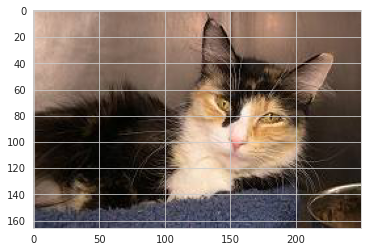

In [ ]:
plt.imshow(cat_cell);

In [ ]:
cat_cell.shape

(166, 250, 3)

In [ ]:
os.listdir(train_path+'dog')[:10]

['dog.2847.jpg',
 '2598.jpg',
 'dog.10428.jpg',
 'dog.11259.jpg',
 'dog.1190.jpg',
 'dog.11819.jpg',
 '2532.jpg',
 'dog.10210.jpg',
 'dog.10943.jpg',
 'dog.1173.jpg']

In [ ]:
dog_cell_path = train_path+'dog/'+os.listdir(train_path+'dog')[5]

In [ ]:
imread(dog_cell_path)

array([[[128, 122, 110],
        [117, 111,  99],
        [116, 110,  98],
        ...,
        [119, 111, 109],
        [119, 111, 109],
        [120, 112, 110]],

       [[122, 116, 104],
        [112, 106,  94],
        [110, 104,  92],
        ...,
        [106,  98,  96],
        [104,  96,  94],
        [102,  94,  92]],

       [[123, 117, 105],
        [113, 107,  95],
        [108, 102,  90],
        ...,
        [ 98,  90,  88],
        [ 95,  87,  85],
        [ 93,  85,  83]],

       ...,

       [[ 33,  39,  37],
        [ 35,  41,  39],
        [ 36,  42,  40],
        ...,
        [ 42,  43,  48],
        [ 23,  24,  29],
        [ 42,  43,  48]],

       [[ 37,  41,  40],
        [ 37,  41,  40],
        [ 42,  46,  45],
        ...,
        [ 32,  33,  38],
        [ 27,  28,  33],
        [ 35,  36,  41]],

       [[ 43,  47,  46],
        [ 44,  48,  47],
        [ 52,  56,  55],
        ...,
        [ 34,  35,  40],
        [ 30,  31,  36],
        [ 38,  39,  44]]

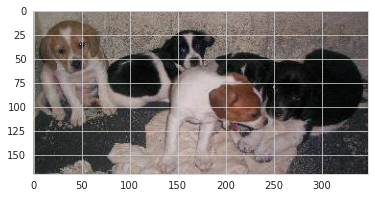

In [ ]:
dog_cell = imread(dog_cell_path)
plt.imshow(dog_cell);

In [ ]:
dog_cell.shape

(170, 349, 3)

In [ ]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (374, 500, 3)


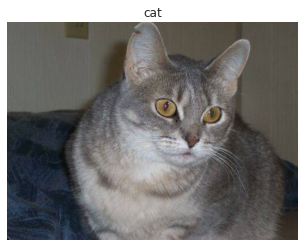

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (375, 499, 3)


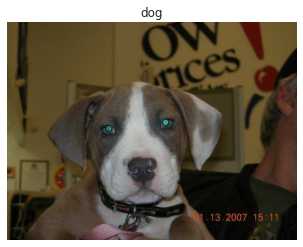

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (374, 500, 3)


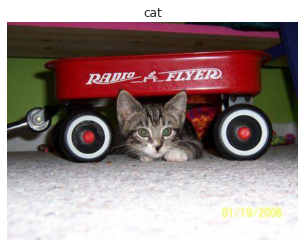

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [ ]:
dog_cell.shape

(170, 349, 3)

In [ ]:
cat_cell.shape

(166, 250, 3)

x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [ ]:
x = [imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog')]
y = [imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog')]

In [ ]:
x[:5]

[374, 434, 261, 500, 499]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


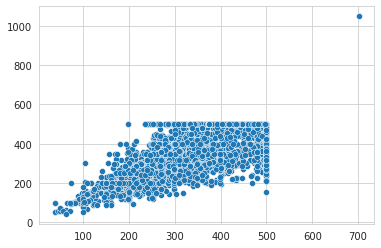

In [ ]:
sns.scatterplot(x,y);

In [ ]:
np.mean(x), np.median(x)

(365.0505372065261, 374.0)

In [ ]:
np.mean(y), np.median(y)

(398.9930362116992, 426.0)

In [ ]:
image_shape = (200,200,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [ ]:
dog_cell.max()

255

In [ ]:
cat_cell.max()

255

As we see above, all images have been already scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
#help(ImageDataGenerator)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

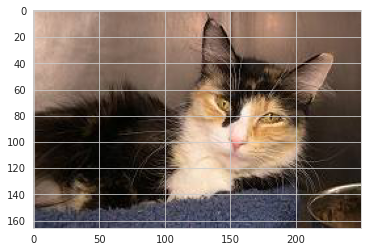

In [ ]:
plt.imshow(cat_cell);

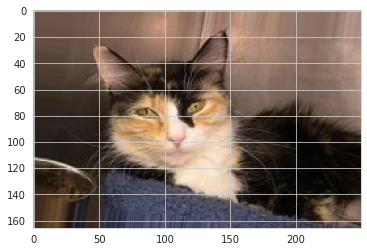

In [ ]:
plt.imshow(image_gen.random_transform(cat_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [ ]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [ ]:
batch_size = 32

In [ ]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(directory=val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
train_image_gen[0]

(array([[[[0.41448328, 0.2838685 , 0.22865401],
          [0.40856385, 0.27949834, 0.23670736],
          [0.38976017, 0.27676758, 0.24911861],
          ...,
          [0.29342172, 0.18753935, 0.08165699],
          [0.29411766, 0.18815717, 0.08209251],
          [0.29411766, 0.18599118, 0.07487256]],
 
         [[0.41525632, 0.28541455, 0.22788098],
          [0.41088298, 0.27872533, 0.23284215],
          [0.39826363, 0.28140584, 0.2506647 ],
          ...,
          [0.29411766, 0.17810471, 0.04858431],
          [0.29394037, 0.17611602, 0.04331455],
          [0.29321837, 0.17467204, 0.04403654]],
 
         [[0.41602936, 0.28661758, 0.22779405],
          [0.41224384, 0.27938965, 0.23089343],
          [0.40184557, 0.28173774, 0.24790446],
          ...,
          [0.29058957, 0.16941439, 0.04666537],
          [0.28953904, 0.16764186, 0.04804443],
          [0.28809506, 0.16547588, 0.05021041]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
train_image_gen[0][0].shape

(32, 200, 200, 3)

In [ ]:
train_image_gen[0][0][0].shape

(200, 200, 3)

In [ ]:
len(train_image_gen), len(val_image_gen)

(548, 72)

In [ ]:
len(train_image_gen)*batch_size, len(val_image_gen)*batch_size 

(17536, 2304)

In [ ]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get a sample of the testing data batch 
images, labels = val_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

In [ ]:
# Initialize CNN
model = Sequential()

# 1st convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolution
model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd convolution
model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th convolution
model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th convolution
model.add(Conv2D(filters=512, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten
model.add(Flatten())

# full connection w/ dropout  
model.add(Dense(units=1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=256))
model.add(Activation('relu')) 
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1))
model.add(Activation('sigmoid'))


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=2, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=25,restore_best_weights=True)
callbacks_list2=[learning_rate_reduction,early_stopping]

best_model = ModelCheckpoint('cats_v_dogs.h5', monitor='val_accuracy', verbose=2, 
                             save_best_only=True, mode='max')

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 198, 198, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 128)      5

In [ ]:
model.fit(train_image_gen,
          epochs=50,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=callbacks_list2)


Epoch 1/50
548/548 [==============================] - 238s 409ms/step - loss: 0.9630 - accuracy: 0.6944 - val_loss: 0.6918 - val_accuracy: 0.5371 - lr: 0.0010
Epoch 2/50
548/548 [==============================] - 220s 401ms/step - loss: 0.5265 - accuracy: 0.7517 - val_loss: 0.6287 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 3/50
548/548 [==============================] - 220s 401ms/step - loss: 0.4661 - accuracy: 0.7899 - val_loss: 0.8343 - val_accuracy: 0.6319 - lr: 0.0010
Epoch 4/50
548/548 [==============================] - 218s 397ms/step - loss: 0.4198 - accuracy: 0.8121 - val_loss: 0.6150 - val_accuracy: 0.6764 - lr: 0.0010
Epoch 5/50
548/548 [==============================] - 216s 395ms/step - loss: 0.3805 - accuracy: 0.8410 - val_loss: 0.4453 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 6/50
548/548 [==============================] - 219s 400ms/step - loss: 0.3303 - accuracy: 0.8609 - val_loss: 0.6404 - val_accuracy: 0.6480 - lr: 0.0010
Epoch 7/50
548/548 [==========================

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.963,0.694,0.692,0.537,0.001
1,0.526,0.752,0.629,0.639,0.001
2,0.466,0.790,0.834,0.632,0.001
3,0.420,0.812,0.615,0.676,0.001
4,0.380,0.841,0.445,0.806,0.001


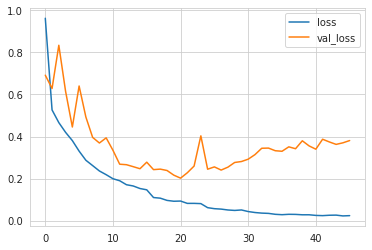

In [ ]:
summary[["loss", "val_loss"]].plot();

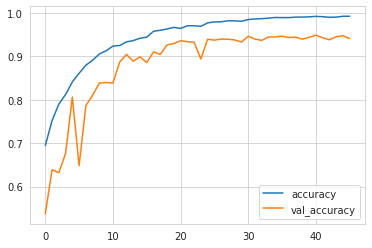

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 23s 322ms/step - loss: 0.2112 - accuracy: 0.9284
Test loss: 0.21119776368141174
Test accuracy: 0.9283843040466309


In [ ]:
pred_prob = model.predict(val_image_gen)

In [ ]:
pred_prob

array([[4.9414698e-02],
       [1.0325542e-08],
       [4.8649652e-04],
       ...,
       [9.9999058e-01],
       [9.9983311e-01],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_pred = pred_prob > 0.5

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val = val_image_gen.classes
y_val

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1219
           1       0.94      0.91      0.92      1071

    accuracy                           0.93      2290
   macro avg       0.93      0.93      0.93      2290
weighted avg       0.93      0.93      0.93      2290



In [ ]:
confusion_matrix(y_val, y_pred)

array([[1154,   65],
       [  97,  974]])

In [ ]:
model.save('cat_dog_classification1.h5')

# Prediction

In [ ]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
model=load_model('/content/drive/MyDrive/DeepLearning/cat_dog_classification1.h5')

In [ ]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    #create 25 random index from test photos
    from numpy.random import randint
    x=randint(6396,size=25)
    #create 5x5 axis
    f, ax = plt.subplots(5,5, figsize=(15,15))
    for i in range(0,25):
          # Import the target image and preprocess it
          images=os.listdir(test_path)[x[i]]
          img_path = test_path + "/" + images
          img = image.load_img(img_path, target_size=img_size)
          img = np.array(img)
          if img.max() > 1:
            img = img/255
          # Make a prediction
          pred = model.predict(np.expand_dims(img, axis=0))
          #print("prediction_probability: ", pred.max())
          # Get the predicted class
          if len(pred[0]) > 1: # check for multi-class
              pred_class = class_names[pred.argmax()] # if more than one output, take the max
          else:
              pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
          
          # Plot the image and predicted class
          ax[i//5, i%5].imshow(img)
          ax[i//5, i%5].axis('off')
          ax[i//5, i%5].set_title("Predicted:{}".format(pred_class)) 
          plt.axis(False);
    plt.tight_layout()
    plt.show()

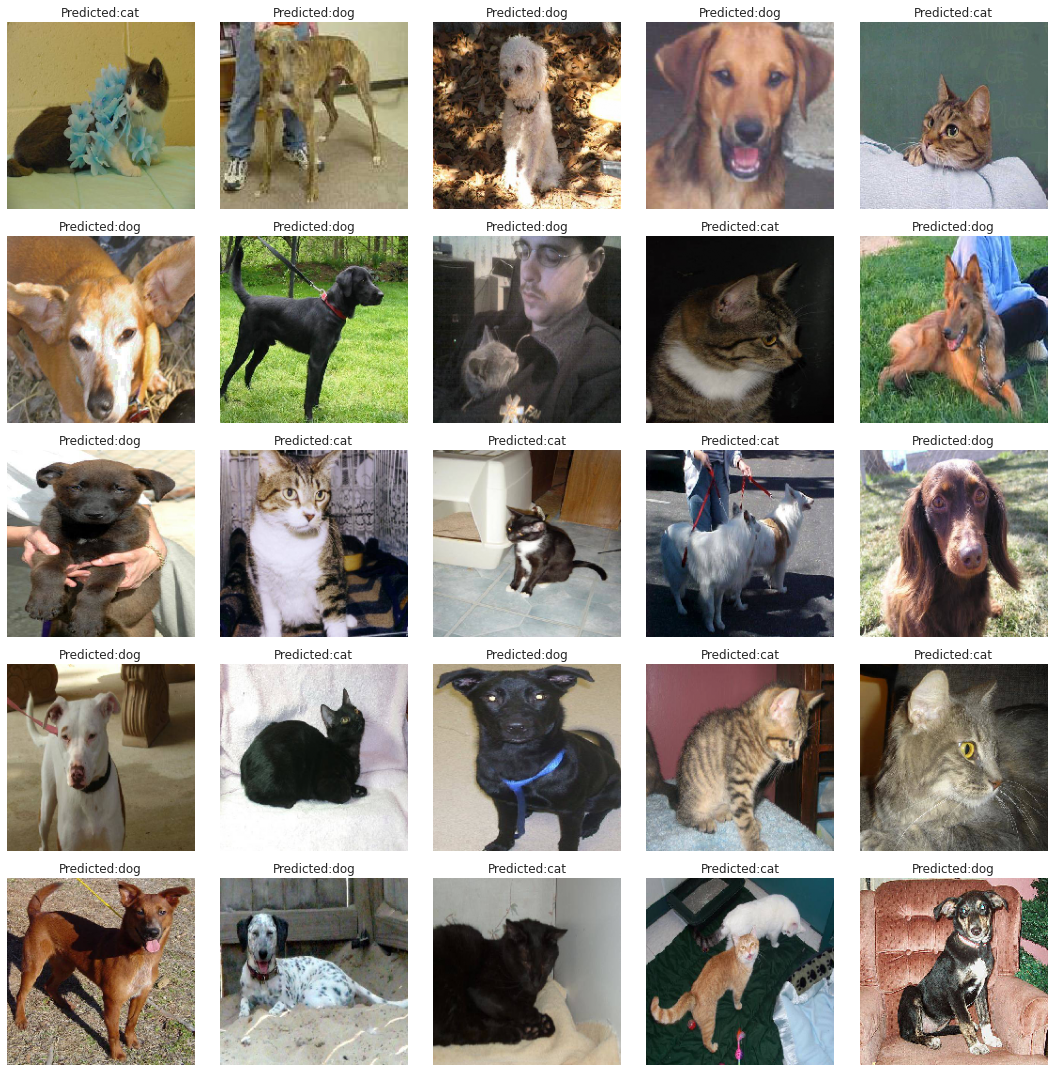

In [ ]:
#make 25 prediction on test data over 25 randomly chosen fotos
pred_and_plot(model, image_shape[:2])